In [1]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# for saving the model
import pickle

In [3]:
train_data=pd.read_csv('processed_data.csv',index_col=0)
train_data.head()

,Total_Stops,Price,day_of_journey,month_of_journey,Dep_time_hr,Dep_time_minute,Arr_time_hr,Arr_time_minute,duration_hours,duration_minutes,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5
0,0,3897.0,24,3,22,20,1,10,2,50,...,0,0,0,0,1,0,13,29,13,5
1,2,7662.0,5,1,5,50,13,15,7,25,...,0,0,0,0,0,2,25,1,3,5
2,2,13882.0,6,9,9,25,4,25,19,0,...,1,0,0,0,0,3,32,4,5,5
3,1,6218.0,5,12,18,5,23,30,5,25,...,0,0,0,0,0,2,34,3,13,5
4,1,13302.0,3,1,16,50,21,35,4,45,...,0,0,0,0,1,0,34,8,13,5


## Splitting the dataset into train and test data

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X=train_data.drop('Price',axis=1)   # all columns except the price column
y=train_data['Price']               # the price column for which we are predicting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)    # 70% train, 30% test

## Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
# creating an instance of the Linear Regression model
model_linear_reg=LinearRegression()

In [8]:
# fitting the model
model_linear_reg.fit(X_train,y_train)

LinearRegression()

In [9]:
# making predictions on the test data
predictions_linear_reg=model_linear_reg.predict(X_test)

In [10]:
predictions_linear_reg

array([12161.24603679,  5414.47488192,  2530.61235459, ...,
        3624.95158967,  5834.97023037, 11389.53749972])

**Now we need to check how well did our model predict**

In [11]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,explained_variance_score

In [12]:
# Defining a function that prints out all the metrics
def metrics(y_true,y_pred):
    print(f'MAE: ',mean_absolute_error(y_true,y_pred))
    print(f'MSE: ',mean_squared_error(y_true,y_pred))
    print(f'RMSE: ',mean_squared_error(y_true,y_pred)**0.5)
    print(f'Explained Variance Score: ',explained_variance_score(y_true,y_pred))

In [13]:
# function for calculating the accuracy
def accuracy(y_true,y_predictions):
    errors = abs(y_predictions - y_true)
    mape = 100 * np.mean(errors / y_true)
    accuracy_model = 100 - mape
    return accuracy_model

In [14]:
metrics(y_test,predictions_linear_reg)

MAE:  1924.55369997618
MSE:  7231108.603004544
RMSE:  2689.0720709948523
Explained Variance Score:  0.6202688414347862


In [15]:
accuracy(y_test,predictions_linear_reg)

76.85989996564984

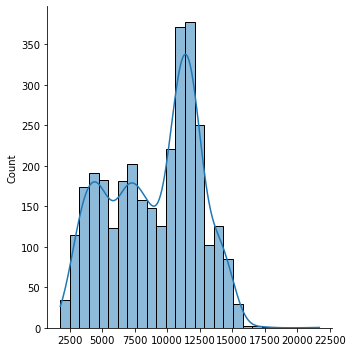

In [16]:
sns.displot(predictions_linear_reg,kde=True)

In [17]:
#saving the model in a pickle file
file=open('linear_reg.pkl','wb')
pickle.dump(model_linear_reg,file)

## Random Forest Model

In [18]:
from sklearn.ensemble import RandomForestRegressor

In [19]:
# creating an instance of the Random Forest model
model_random_forest=RandomForestRegressor(n_estimators=500,min_samples_split=3)

In [20]:
# fitting the model
model_random_forest.fit(X_train,y_train)

RandomForestRegressor(min_samples_split=3, n_estimators=500)

In [21]:
# making predictions on the test data
predictions_random_forest=model_random_forest.predict(X_test)

In [22]:
metrics(y_test,predictions_random_forest)

MAE:  1146.6746186809169
MSE:  3481398.525495711
RMSE:  1865.8506171437496
Explained Variance Score:  0.8171396091150154


In [23]:
accuracy(y_test,predictions_random_forest) 

87.2050840872908

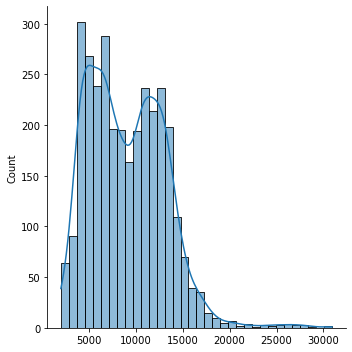

In [24]:
sns.displot(predictions_random_forest,kde=True)

In [25]:
#saving the model in a pickle file
file=open('random_forest.pkl','wb')
pickle.dump(model_random_forest,file)

**Hyper-parameter Tuning**

In [26]:
from sklearn.model_selection import RandomizedSearchCV

In [27]:
# For using RandomizedSearchCV we would need to specify the parameters and their corresponding values on which it would work
# and find the best values

n_estimators=[int(x) for x in np.linspace(start=200,stop=2000,num=11)]
min_samples_split=[2,4,6,8,10]
max_features = ['auto', 'sqrt']
bootstrap = [True, False]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_leaf = [1, 2, 4,6]

In [28]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [29]:
print(random_grid)

{'n_estimators': [200, 380, 560, 740, 920, 1100, 1280, 1460, 1640, 1820, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110], 'min_samples_split': [2, 4, 6, 8, 10], 'min_samples_leaf': [1, 2, 4, 6], 'bootstrap': [True, False]}


In [30]:
model_rf_tuned=RandomForestRegressor()

In [31]:
# n_iter: number of different combinations for which it would run
# cv: Cross validation
# param_distributions: The list of parameters for which it would check
random_forest_tuned = RandomizedSearchCV(estimator = model_rf_tuned, 
                               param_distributions = random_grid, 
                               n_iter = 80, cv = 3, verbose=2, 
                               random_state=42, n_jobs = -1)

In [32]:
# fit the model to the data
random_forest_tuned.fit(X_train,y_train)

# This training would take time depending on the number of values specified for each of the parameters of RandomizedSearchCV

Fitting 3 folds for each of 80 candidates, totalling 240 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=80,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 6],
                                        'min_samples_split': [2, 4, 6, 8, 10],
                                        'n_estimators': [200, 380, 560, 740,
                                                         920, 1100, 1280, 1460,
                                                         1640, 1820, 2000]},
                   random_state=42, verbose=2)

In [33]:
# list the values of the best parameters
random_forest_tuned.best_params_

{'n_estimators': 1640,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [34]:
# predicting the prices using the tuned model
predictions_rf_tuned=random_forest_tuned.predict(X_test)

In [35]:
metrics(y_test,predictions_rf_tuned)

MAE:  1109.1669836900492
MSE:  3099996.0122202244
RMSE:  1760.6805537121788
Explained Variance Score:  0.837169696040516


In [36]:
accuracy(y_test,predictions_rf_tuned)

87.60033586142406

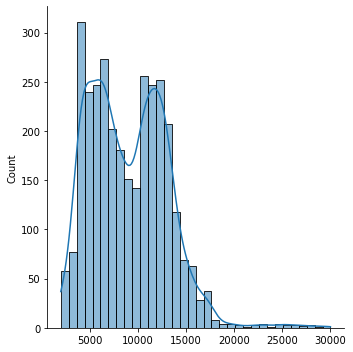

In [37]:
sns.displot(predictions_rf_tuned,kde=True)

In [38]:
# saving the model
file=open('random_forest_tuned.pkl','wb')
pickle.dump(random_forest_tuned,file)

**We were able to improve the accuracy by about 0.3% by the tuning the parameters. The change would vary depending upon the range of parameters chosen for the hyper parameter tuning.**

## K-Nearest Neighbour

In [39]:
from sklearn.neighbors import KNeighborsRegressor

**Without Scaling**

In [40]:
model_knn=KNeighborsRegressor()

In [41]:
model_knn.fit(X_train,y_train)

KNeighborsRegressor()

In [42]:
pred_knn=model_knn.predict(X_test)

In [43]:
metrics(y_test,pred_knn)

MAE:  1760.9480811232447
MSE:  6751763.6693042135
RMSE:  2598.415607500889
Explained Variance Score:  0.6455030860177375


In [44]:
accuracy(y_test,pred_knn)

80.05597995701126

In [45]:
# saving the model
file=open('knn_not_scaled.pkl','wb')
pickle.dump(model_knn,file)

**With Scaling**

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler=StandardScaler()

In [48]:
x_train_scaled=scaler.fit_transform(X_train)

In [49]:
x_test_scaled=scaler.transform(X_test)

In [50]:
model_knn_scaled=KNeighborsRegressor()

In [51]:
model_knn_scaled.fit(x_train_scaled,y_train)

KNeighborsRegressor()

In [52]:
pred_knn_scaled=model_knn_scaled.predict(x_test_scaled)

In [53]:
pred_knn_scaled

array([11142.6,  5485. ,  3627. , ...,  4221.8,  6716.4, 12366.6])

In [54]:
metrics(y_test,pred_knn_scaled)

MAE:  1514.3419032761312
MSE:  4969609.995444618
RMSE:  2229.2622087687705
Explained Variance Score:  0.7389425603308137


In [55]:
accuracy(y_test,pred_knn_scaled)

82.6718727871027

In [56]:
# saving the model
file=open('knn_scaled.pkl','wb')
pickle.dump(model_knn_scaled,file)

From the two different models of KNN trained above we can see that scaling the values helps in getting a much better accuracy. This is because KNN is based on the idea of the distance of the current point with its K nearest neighbors and hence scaling would help reduce the dominance of scaling factors.

**Hyper-parameter Tuning**

In [57]:
n_neighbors=[int(x) for x in np.linspace(2,40,8)]
weights=['uniform','distance']
algorithm=['auto', 'ball_tree', 'kd_tree', 'brute']
p=[int(x) for x in np.arange(1,6)]


In [58]:
knn_grid={'n_neighbors':n_neighbors, 'weights':weights,'algorithm':algorithm,'p':p}

In [59]:
print(knn_grid)

{'n_neighbors': [2, 7, 12, 18, 23, 29, 34, 40], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'], 'p': [1, 2, 3, 4, 5]}


In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
knn_tuned_model=KNeighborsRegressor()

In [62]:
knn_tuned=RandomizedSearchCV(estimator=knn_tuned_model,param_distributions=knn_grid,cv=3,verbose=2,n_iter=70)

In [63]:
knn_tuned.fit(x_train_scaled,y_train)

Fitting 3 folds for each of 70 candidates, totalling 210 fits
[CV] END algorithm=brute, n_neighbors=7, p=3, weights=uniform; total time=  25.4s
[CV] END algorithm=brute, n_neighbors=7, p=3, weights=uniform; total time=  25.4s
[CV] END algorithm=brute, n_neighbors=7, p=3, weights=uniform; total time=  26.0s
[CV] END algorithm=auto, n_neighbors=34, p=2, weights=uniform; total time=   0.5s
[CV] END algorithm=auto, n_neighbors=34, p=2, weights=uniform; total time=   0.5s
[CV] END algorithm=auto, n_neighbors=34, p=2, weights=uniform; total time=   0.5s
[CV] END algorithm=kd_tree, n_neighbors=12, p=3, weights=distance; total time=  23.8s
[CV] END algorithm=kd_tree, n_neighbors=12, p=3, weights=distance; total time=  23.5s
[CV] END algorithm=kd_tree, n_neighbors=12, p=3, weights=distance; total time=  23.8s
[CV] END algorithm=auto, n_neighbors=18, p=1, weights=uniform; total time=   1.1s
[CV] END algorithm=auto, n_neighbors=18, p=1, weights=uniform; total time=   1.1s
[CV] END algorithm=auto,

[CV] END algorithm=ball_tree, n_neighbors=7, p=3, weights=distance; total time=  26.3s
[CV] END algorithm=ball_tree, n_neighbors=7, p=3, weights=distance; total time=  27.0s
[CV] END algorithm=kd_tree, n_neighbors=29, p=5, weights=distance; total time=  24.2s
[CV] END algorithm=kd_tree, n_neighbors=29, p=5, weights=distance; total time=  23.9s
[CV] END algorithm=kd_tree, n_neighbors=29, p=5, weights=distance; total time=  24.2s
[CV] END algorithm=kd_tree, n_neighbors=29, p=3, weights=distance; total time=  23.8s
[CV] END algorithm=kd_tree, n_neighbors=29, p=3, weights=distance; total time=  24.1s
[CV] END algorithm=kd_tree, n_neighbors=29, p=3, weights=distance; total time=  23.9s
[CV] END algorithm=ball_tree, n_neighbors=29, p=1, weights=distance; total time=   1.4s
[CV] END algorithm=ball_tree, n_neighbors=29, p=1, weights=distance; total time=   1.7s
[CV] END algorithm=ball_tree, n_neighbors=29, p=1, weights=distance; total time=   1.6s
[CV] END algorithm=brute, n_neighbors=7, p=4, 

[CV] END algorithm=ball_tree, n_neighbors=34, p=1, weights=uniform; total time=   0.5s
[CV] END algorithm=auto, n_neighbors=2, p=1, weights=uniform; total time=   0.3s
[CV] END algorithm=auto, n_neighbors=2, p=1, weights=uniform; total time=   0.3s
[CV] END algorithm=auto, n_neighbors=2, p=1, weights=uniform; total time=   0.3s
[CV] END algorithm=kd_tree, n_neighbors=23, p=1, weights=distance; total time=   0.6s
[CV] END algorithm=kd_tree, n_neighbors=23, p=1, weights=distance; total time=   0.6s
[CV] END algorithm=kd_tree, n_neighbors=23, p=1, weights=distance; total time=   0.6s
[CV] END algorithm=ball_tree, n_neighbors=34, p=5, weights=distance; total time=  10.3s
[CV] END algorithm=ball_tree, n_neighbors=34, p=5, weights=distance; total time=  10.9s
[CV] END algorithm=ball_tree, n_neighbors=34, p=5, weights=distance; total time=  10.5s
[CV] END algorithm=ball_tree, n_neighbors=18, p=2, weights=distance; total time=   0.5s
[CV] END algorithm=ball_tree, n_neighbors=18, p=2, weights=d

RandomizedSearchCV(cv=3, estimator=KNeighborsRegressor(), n_iter=70,
                   param_distributions={'algorithm': ['auto', 'ball_tree',
                                                      'kd_tree', 'brute'],
                                        'n_neighbors': [2, 7, 12, 18, 23, 29,
                                                        34, 40],
                                        'p': [1, 2, 3, 4, 5],
                                        'weights': ['uniform', 'distance']},
                   verbose=2)

In [64]:
knn_tuned.best_params_

{'weights': 'uniform', 'p': 2, 'n_neighbors': 7, 'algorithm': 'kd_tree'}

In [65]:
predictions_knn_tuned=knn_tuned.predict(x_test_scaled)

In [66]:
predictions_knn_tuned

array([10670.        ,  5017.85714286,  3631.        , ...,
        4264.42857143,  6552.85714286, 12269.14285714])

In [67]:
metrics(y_test,predictions_knn_tuned)

MAE:  1506.7589480722086
MSE:  4840793.215339553
RMSE:  2200.1802688278867
Explained Variance Score:  0.7457253120461651


In [68]:
accuracy(y_test,predictions_knn_tuned)

82.78636345566466

In [69]:
# saving the model
file=open('knn_tuned.pkl','wb')
pickle.dump(knn_tuned,file)

## Neural Network

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
scaler=MinMaxScaler()

In [72]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [73]:
X_train_scaled.shape

(7477, 34)

In [74]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [75]:
model_nn=Sequential()

model_nn.add(Dense(34,activation='relu'))
model_nn.add(Dense(34,activation='relu'))
model_nn.add(Dense(34,activation='relu'))
model_nn.add(Dense(34,activation='relu'))
model_nn.add(Dense(1))

model_nn.compile(optimizer='adam',loss='mse')

In [76]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',patience=20,verbose=1)

In [77]:
model_nn.fit(x=X_train_scaled,y=y_train,validation_data=(X_test_scaled,y_test),epochs=300,batch_size=32,callbacks=[early_stop])

Epoch 1/300
234/234 [==============================] - 13s 9ms/step - loss: 65986968.0000 - val_loss: 16552040.0000
Epoch 2/300
234/234 [==============================] - 2s 7ms/step - loss: 13003942.0000 - val_loss: 9856252.0000
Epoch 3/300
234/234 [==============================] - 2s 7ms/step - loss: 9220638.0000 - val_loss: 8236470.0000
Epoch 4/300
234/234 [==============================] - 2s 7ms/step - loss: 8361335.0000 - val_loss: 7773651.5000
Epoch 5/300
234/234 [==============================] - 2s 7ms/step - loss: 8020816.0000 - val_loss: 7566870.0000
Epoch 6/300
234/234 [==============================] - 2s 7ms/step - loss: 7816181.5000 - val_loss: 7392877.5000
Epoch 7/300
234/234 [==============================] - 2s 7ms/step - loss: 7696367.0000 - val_loss: 7347743.0000
Epoch 8/300
234/234 [==============================] - 2s 7ms/step - loss: 7609457.5000 - val_loss: 7539956.5000
Epoch 9/300
234/234 [==============================] - 2s 7ms/step - loss: 7549570.5000 - va

Epoch 73/300
234/234 [==============================] - 2s 7ms/step - loss: 5397030.5000 - val_loss: 5374489.0000
Epoch 74/300
234/234 [==============================] - 2s 7ms/step - loss: 5351343.0000 - val_loss: 5414056.5000
Epoch 75/300
234/234 [==============================] - 2s 7ms/step - loss: 5331757.0000 - val_loss: 5381135.5000
Epoch 76/300
234/234 [==============================] - 2s 7ms/step - loss: 5306182.5000 - val_loss: 5321974.5000
Epoch 77/300
234/234 [==============================] - 2s 7ms/step - loss: 5289028.5000 - val_loss: 5459182.0000
Epoch 78/300
234/234 [==============================] - 2s 7ms/step - loss: 5288125.5000 - val_loss: 5297204.0000
Epoch 79/300
234/234 [==============================] - 2s 7ms/step - loss: 5243391.5000 - val_loss: 5375947.0000
Epoch 80/300
234/234 [==============================] - 2s 7ms/step - loss: 5230299.5000 - val_loss: 5304029.5000
Epoch 81/300
234/234 [==============================] - 2s 7ms/step - loss: 5241181.0000

234/234 [==============================] - 1s 6ms/step - loss: 4498405.5000 - val_loss: 4681346.0000
Epoch 145/300
234/234 [==============================] - 1s 6ms/step - loss: 4502609.0000 - val_loss: 4753065.0000
Epoch 146/300
234/234 [==============================] - 1s 6ms/step - loss: 4504062.5000 - val_loss: 4627386.5000
Epoch 147/300
234/234 [==============================] - 1s 6ms/step - loss: 4500926.5000 - val_loss: 4688620.5000
Epoch 148/300
234/234 [==============================] - 1s 6ms/step - loss: 4504505.5000 - val_loss: 4631725.0000
Epoch 149/300
234/234 [==============================] - 2s 6ms/step - loss: 4510148.5000 - val_loss: 4705497.5000
Epoch 150/300
234/234 [==============================] - 2s 7ms/step - loss: 4539395.5000 - val_loss: 4774863.5000
Epoch 151/300
234/234 [==============================] - 2s 7ms/step - loss: 4493040.0000 - val_loss: 4599938.5000
Epoch 152/300
234/234 [==============================] - 1s 6ms/step - loss: 4473956.5000 - va

234/234 [==============================] - 1s 6ms/step - loss: 4192103.2500 - val_loss: 4329473.5000
Epoch 216/300
234/234 [==============================] - 1s 6ms/step - loss: 4195201.0000 - val_loss: 4308864.0000
Epoch 217/300
234/234 [==============================] - 1s 6ms/step - loss: 4176681.5000 - val_loss: 4274216.5000
Epoch 218/300
234/234 [==============================] - 1s 6ms/step - loss: 4170392.5000 - val_loss: 4353923.5000
Epoch 219/300
234/234 [==============================] - 1s 6ms/step - loss: 4171758.0000 - val_loss: 4255607.5000
Epoch 220/300
234/234 [==============================] - 1s 6ms/step - loss: 4157919.2500 - val_loss: 4344093.5000
Epoch 221/300
234/234 [==============================] - 1s 6ms/step - loss: 4189432.2500 - val_loss: 4356089.5000
Epoch 222/300
234/234 [==============================] - 1s 6ms/step - loss: 4198977.5000 - val_loss: 4333391.5000
Epoch 223/300
234/234 [==============================] - 1s 6ms/step - loss: 4166179.2500 - va

234/234 [==============================] - 2s 8ms/step - loss: 3955922.7500 - val_loss: 4125842.2500
Epoch 287/300
234/234 [==============================] - 2s 10ms/step - loss: 3948049.2500 - val_loss: 4074336.2500
Epoch 288/300
234/234 [==============================] - 2s 10ms/step - loss: 3974253.0000 - val_loss: 4114538.0000
Epoch 289/300
234/234 [==============================] - 2s 10ms/step - loss: 3957202.0000 - val_loss: 4048769.2500
Epoch 290/300
234/234 [==============================] - 2s 8ms/step - loss: 3948086.2500 - val_loss: 4075137.2500
Epoch 291/300
234/234 [==============================] - 2s 7ms/step - loss: 3943836.2500 - val_loss: 4303212.5000
Epoch 292/300
234/234 [==============================] - 2s 8ms/step - loss: 3966032.5000 - val_loss: 4079871.2500
Epoch 293/300
234/234 [==============================] - 2s 8ms/step - loss: 3947118.5000 - val_loss: 4136461.0000
Epoch 294/300
234/234 [==============================] - 2s 7ms/step - loss: 3930126.5000 -

In [78]:
losses=pd.DataFrame(model_nn.history.history)

<AxesSubplot:>

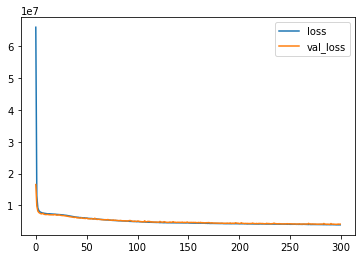

In [79]:
losses.plot()

In [80]:
predictions_nn=model_nn.predict(X_test_scaled)

In [81]:
metrics(y_test,predictions_nn)

MAE:  1452.7866905652788
MSE:  4135239.295286358
RMSE:  2033.528779065189
Explained Variance Score:  0.7864904169742226


In [82]:
predictions_nn=predictions_nn.reshape((3205,))

In [83]:
accuracy(y_test,predictions_nn)

83.66545869127935

**From the graph we can see that we could have trained the model further without overfitting. So let's increase the number of epochs and train the model.**

In [84]:
model_nn=Sequential()

model_nn.add(Dense(34,activation='relu'))
model_nn.add(Dense(34,activation='relu'))
model_nn.add(Dense(34,activation='relu'))
model_nn.add(Dense(34,activation='relu'))
model_nn.add(Dense(1))

model_nn.compile(optimizer='adam',loss='mse')

In [85]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',patience=20,verbose=1)

In [86]:
model_nn.fit(x=X_train_scaled,y=y_train,validation_data=(X_test_scaled,y_test),epochs=500,batch_size=32,callbacks=[early_stop])

Epoch 1/500
234/234 [==============================] - 2s 7ms/step - loss: 63889364.0000 - val_loss: 15999122.0000
Epoch 2/500
234/234 [==============================] - 2s 7ms/step - loss: 12721538.0000 - val_loss: 9910053.0000
Epoch 3/500
234/234 [==============================] - 2s 7ms/step - loss: 9263030.0000 - val_loss: 8306451.0000
Epoch 4/500
234/234 [==============================] - 2s 7ms/step - loss: 8402468.0000 - val_loss: 7779826.5000
Epoch 5/500
234/234 [==============================] - 2s 7ms/step - loss: 7998740.0000 - val_loss: 7521478.5000
Epoch 6/500
234/234 [==============================] - 2s 7ms/step - loss: 7799485.5000 - val_loss: 7594534.0000
Epoch 7/500
234/234 [==============================] - 2s 7ms/step - loss: 7701126.5000 - val_loss: 7284532.0000
Epoch 8/500
234/234 [==============================] - 2s 7ms/step - loss: 7540649.0000 - val_loss: 7235089.5000
Epoch 9/500
234/234 [==============================] - 2s 7ms/step - loss: 7493091.0000 - val

Epoch 73/500
234/234 [==============================] - 1s 6ms/step - loss: 5085558.0000 - val_loss: 5067240.5000
Epoch 74/500
234/234 [==============================] - 1s 6ms/step - loss: 5066624.5000 - val_loss: 5028964.5000
Epoch 75/500
234/234 [==============================] - 1s 6ms/step - loss: 5027120.5000 - val_loss: 5029497.0000
Epoch 76/500
234/234 [==============================] - 1s 6ms/step - loss: 4991919.5000 - val_loss: 5051335.5000
Epoch 77/500
234/234 [==============================] - 1s 6ms/step - loss: 4934143.0000 - val_loss: 4987224.0000
Epoch 78/500
234/234 [==============================] - 1s 6ms/step - loss: 4945532.0000 - val_loss: 4968602.5000
Epoch 79/500
234/234 [==============================] - 1s 6ms/step - loss: 4908898.0000 - val_loss: 4931260.0000
Epoch 80/500
234/234 [==============================] - 1s 6ms/step - loss: 4913507.5000 - val_loss: 4977107.5000
Epoch 81/500
234/234 [==============================] - 1s 6ms/step - loss: 4910379.0000

234/234 [==============================] - 1s 6ms/step - loss: 4260504.5000 - val_loss: 4374264.0000
Epoch 145/500
234/234 [==============================] - 1s 6ms/step - loss: 4288020.5000 - val_loss: 4341319.5000
Epoch 146/500
234/234 [==============================] - 1s 6ms/step - loss: 4299562.5000 - val_loss: 4576099.5000
Epoch 147/500
234/234 [==============================] - 1s 6ms/step - loss: 4267068.0000 - val_loss: 4353316.0000
Epoch 148/500
234/234 [==============================] - 1s 6ms/step - loss: 4238631.5000 - val_loss: 4338193.0000
Epoch 149/500
234/234 [==============================] - 1s 6ms/step - loss: 4247029.0000 - val_loss: 4345696.5000
Epoch 150/500
234/234 [==============================] - 1s 6ms/step - loss: 4255468.5000 - val_loss: 4341140.0000
Epoch 151/500
234/234 [==============================] - 2s 6ms/step - loss: 4255626.0000 - val_loss: 4323999.0000
Epoch 152/500
234/234 [==============================] - 1s 6ms/step - loss: 4228896.5000 - va

234/234 [==============================] - 1s 6ms/step - loss: 4048476.0000 - val_loss: 4390562.0000
Epoch 216/500
234/234 [==============================] - 1s 6ms/step - loss: 4076796.2500 - val_loss: 4137235.0000
Epoch 217/500
234/234 [==============================] - 1s 6ms/step - loss: 4037090.2500 - val_loss: 4096762.2500
Epoch 218/500
234/234 [==============================] - 1s 6ms/step - loss: 4044773.2500 - val_loss: 4108143.0000
Epoch 219/500
234/234 [==============================] - 1s 6ms/step - loss: 4040683.5000 - val_loss: 4207519.0000
Epoch 220/500
234/234 [==============================] - 1s 6ms/step - loss: 4022641.0000 - val_loss: 4087676.0000
Epoch 221/500
234/234 [==============================] - 1s 6ms/step - loss: 4048370.7500 - val_loss: 4176842.2500
Epoch 222/500
234/234 [==============================] - 1s 6ms/step - loss: 4044344.0000 - val_loss: 4076892.5000
Epoch 223/500
234/234 [==============================] - 1s 6ms/step - loss: 4021898.0000 - va

234/234 [==============================] - 2s 6ms/step - loss: 3905062.2500 - val_loss: 4043097.0000
Epoch 287/500
234/234 [==============================] - 1s 6ms/step - loss: 3904708.2500 - val_loss: 4161268.0000
Epoch 288/500
234/234 [==============================] - 2s 7ms/step - loss: 3894784.5000 - val_loss: 3947589.2500
Epoch 289/500
234/234 [==============================] - 2s 6ms/step - loss: 3890105.2500 - val_loss: 3962398.7500
Epoch 290/500
234/234 [==============================] - 1s 6ms/step - loss: 3895423.7500 - val_loss: 3969041.2500
Epoch 291/500
234/234 [==============================] - 1s 6ms/step - loss: 3891267.5000 - val_loss: 3935997.2500
Epoch 292/500
234/234 [==============================] - 2s 6ms/step - loss: 3893261.5000 - val_loss: 3919694.7500
Epoch 293/500
234/234 [==============================] - 2s 6ms/step - loss: 3874308.7500 - val_loss: 3978599.7500
Epoch 294/500
234/234 [==============================] - 2s 7ms/step - loss: 3870718.0000 - va

234/234 [==============================] - 1s 6ms/step - loss: 3739475.0000 - val_loss: 3804950.5000
Epoch 358/500
234/234 [==============================] - 1s 6ms/step - loss: 3710536.7500 - val_loss: 3841062.7500
Epoch 359/500
234/234 [==============================] - 1s 6ms/step - loss: 3718783.2500 - val_loss: 3856317.0000
Epoch 360/500
234/234 [==============================] - 1s 6ms/step - loss: 3703651.2500 - val_loss: 3823106.7500
Epoch 361/500
234/234 [==============================] - 1s 6ms/step - loss: 3696625.5000 - val_loss: 3941260.7500
Epoch 362/500
234/234 [==============================] - 1s 6ms/step - loss: 3695926.2500 - val_loss: 3887225.0000
Epoch 363/500
234/234 [==============================] - 1s 6ms/step - loss: 3709283.0000 - val_loss: 3839650.2500
Epoch 364/500
234/234 [==============================] - 1s 6ms/step - loss: 3673908.2500 - val_loss: 3828245.5000
Epoch 365/500
234/234 [==============================] - 1s 6ms/step - loss: 3683497.7500 - va

In [87]:
losses=pd.DataFrame(model_nn.history.history)

<AxesSubplot:>

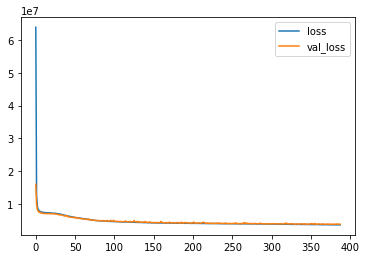

In [88]:
losses.plot()

In [89]:
predictions_nn_more_epochs=model_nn.predict(X_test_scaled)

In [90]:
metrics(y_test,predictions_nn_more_epochs)

MAE:  1393.9390124149888
MSE:  3841866.4512647036
RMSE:  1960.0679710828151
Explained Variance Score:  0.7991859673778406


In [91]:
accuracy(y_test,predictions_nn_more_epochs.reshape(3205,))

83.67155548406285

In [92]:
from tensorflow.keras.models import save_model

In [93]:
save_model(model_nn,'neural_network.h5')

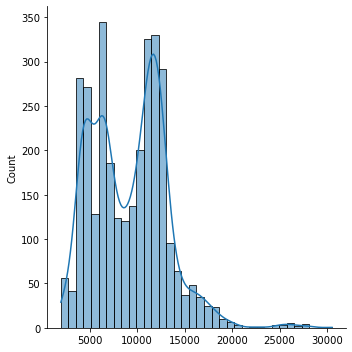

In [94]:
sns.displot(predictions_nn_more_epochs.reshape((3205,)),kde=True)